# Module 7 Exercises - Linear Regression

### Exercise 1:

Using the pandas library, in the datasets folder load the gradedata.csv file as a dataframe. Narrow your data (make the dataframe smaller) by choosing columns that you think can help predict student grades. Use any method that you've learned so far to help your decision on which columns to keep. 

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn #library for predictive modeling

%matplotlib inline

In [29]:
location = "datasets/gradedata.csv"
df = pd.read_csv(location)
df.columns

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [30]:
narrow = df.drop(['fname','lname','address'], axis = 1)
narrow.shape
narrow.describe()

,age,exercise,hours,grade
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,16.578500,3.000500,10.988500,82.556050
std,1.696254,1.423205,4.063942,9.747593
min,14.000000,0.000000,0.000000,32.000000
25%,15.000000,2.000000,8.000000,75.575000
50%,17.000000,3.000000,11.000000,82.700000
75%,18.000000,4.000000,14.000000,89.700000
max,19.000000,5.000000,20.000000,100.000000


In [31]:
narrow['grade'].mean() - 3*narrow['grade'].std()

53.313272248856

In [32]:
narrow = narrow[narrow['grade']>=53.31]

### Exercise 2:

Using the dataframe in the exercise above, clean and prepare your data. This means to eliminate any null (missing) values (either by dropping or filling them) and to transform any data column types to numerical values that a model can interpret. For example, if the column has string values, convert them to integers that best represent their order.

In [33]:
#narrow.drop_duplicates(inplace = True)
#narrow.shape

In [34]:
#narrow.dropna(axis = 0, how = 'all', inplace = True)
#narrow.shape

In [35]:
narrow.dtypes

gender       object
age           int64
exercise      int64
hours         int64
grade       float64
dtype: object

In [36]:
# force grade into numerical and if not numerical then delete entry
narrow['grade'] = pd.to_numeric(narrow['grade'], errors = 'coerce')
narrow.dtypes

gender       object
age           int64
exercise      int64
hours         int64
grade       float64
dtype: object

In [37]:
# classify gender: male = 0, female = 1
narrow['gender'] = pd.Series(np.where(narrow['gender'].values == 'female', 1, 0),
          narrow.index)
narrow.head()

,gender,age,exercise,hours,grade
0,1,17,3,10,82.4
1,0,18,4,4,78.2
2,0,18,5,9,79.3
3,1,14,2,7,83.2
4,1,18,4,15,87.4


In [39]:
#clean = narrow.dropna(axis = 0, how = 'any')
clean.shape
clean = narrow

### Exercise 3:

Using the cleaned dataframe in the exercise above, use the sklearn library to split the data into training and test datasets. Make the test size 30%.

In [40]:
# assign predictive features (variables) to dataframe
X = clean.drop('grade', axis = 1)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, clean['grade'], test_size=0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1398, 4)
(600, 4)
(1398,)
(600,)


### Exercise 4:

Using the training data from the previous exercise, set a linear regression function to fit the data (build the model).

In [41]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

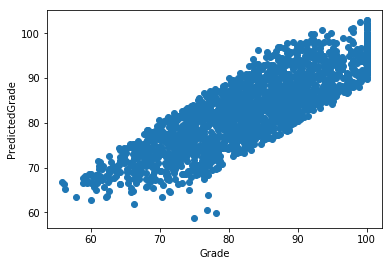

In [53]:
#visual comparison between the true price of a house and the price the model predicted
plt.scatter(clean['grade'], lm.predict(X))
plt.xlabel("Grade")
plt.ylabel("PredictedGrade")
plt.show()

### Exercise 5:

What is the intercept coefficient (y-intercept) for the linear regression model?

In [43]:
lm.intercept_

56.31360736702681

In [44]:
import statsmodels.formula.api as smf
res = smf.ols('grade ~ gender + age + exercise + hours', data=clean).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:29:10   Log-Likelihood:                -6226.0
No. Observations:                1998   AIC:                         1.246e+04
Df Residuals:                    1993   BIC:                         1.249e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.0581      1.284     44.433      0.000      54.540      59.576
gender         0.4850      0.245      1.982      0.048       0.005       0.965
age            0.0764      0.072      1.059      0.290      -0.065       0.218
exercise       0.9751      0.086     11.341      0.000       0.807       1.144
hours          1.9207      0.030     63.736      0.000       1.862       1.980
==============================================================================
Omnibus:                      467.863   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.653
Skew:                           0.045   Prob(JB):                     2.52e-19
Kurtosis:                       1.990   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# age P>abs(t) is 0.595, so we'll remove it as well as gender
res = smf.ols('grade ~ exercise + hours', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:29:12   Log-Likelihood:                -6300.8
No. Observations:                2000   AIC:                         1.261e+04
Df Residuals:                    1997   BIC:                         1.262e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5316      0.447    130.828      0.000      57.654      59.409
exercise       0.9892      0.089     11.131      0.000       0.815       1.163
hours          1.9162      0.031     61.575      0.000       1.855       1.977
==============================================================================
Omnibus:                      318.721   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2158.000
Skew:                          -0.564   Prob(JB):                         0.00
Kurtosis:                       7.962   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# try removing intercept
res = smf.ols('grade ~ exercise + hours -1', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 2.160e+04
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:29:12   Log-Likelihood:                -8559.5
No. Observations:                2000   AIC:                         1.712e+04
Df Residuals:                    1998   BIC:                         1.713e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exercise       7.7302      0.224     34.521      0.000       7.291       8.169
hours          4.9769      0.063     78.412      0.000       4.852       5.101
==============================================================================
Omnibus:                        0.614   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.677
Skew:                          -0.011   Prob(JB):                        0.713
Kurtosis:                       2.913   Cond. No.                         7.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 6:

Use the predict function on the training data and the test data.

In [47]:
# calculate the model using the training data
lm.fit(X_train, Y_train)

# predictions for training and test data
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [48]:
# evaluate the accuracy of the model of training vs test
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

0.6877641136697592
0.6566059262868752


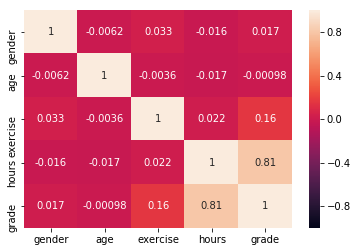

In [49]:
# checking correlation heatmap because the training data scores surprised me
import seaborn as sns
corr = clean.corr()
sns.heatmap(corr, vmin = -1,annot = True)

### Exercise 7:

Calculate the MSE (mean squared error) of the training and test predictions. How "good" was the linear regression model at predicting the test data compared to the training data?

In [22]:
'''
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, clean['grade'], test_size=0.30, random_state = 5)
'''
lm.predict(X)
delta = lm.predict(X) - clean['grade']
delta

0       -1.331207
1       -8.447581
2        1.270969
3       -9.283516
4        4.571587
5        5.418882
6       -3.132938
7        3.022096
8        4.483066
9        0.332907
10      -0.022943
11       4.579184
12       5.056157
13       5.476611
14      -0.651267
15      -0.860910
16      -9.922522
17      -3.169596
18       3.752616
19      -0.646939
20       4.012522
21      -1.844511
22       6.339115
23       7.569366
24      -7.791730
25      -5.691009
26       3.453610
27       7.367704
28       6.617992
29      -5.258116
          ...    
1970    -5.810728
1971     2.425706
1972     8.824668
1973     5.951237
1974     7.023333
1975     8.016088
1976     0.879629
1977    10.227121
1978     1.266641
1979    -3.172563
1980     7.825286
1981    -7.260020
1982     9.872849
1983    -7.153067
1984    -6.263679
1985    -0.981340
1986    -3.245901
1987     5.637211
1988     8.031176
1989    -4.231944
1990     5.928699
1991     9.541266
1992     2.398823
1993     5.494940
1994     5

In [23]:
delsquared = delta**2

In [24]:
delsqsum = delsquared.sum()

In [25]:
meanSquareError = delsqsum / len(delta.index) #1976
meanSquareError

29.834035080804295

In [26]:
# apparently there's a method for this???
from sklearn.metrics import mean_squared_error as mse
y_true = clean['grade']
y_pred = lm.predict(X)
mse(y_true, y_pred)

29.834035080804295

In [27]:
lm.predict(X_test)

array([ 89.34875773,  88.07342194,  77.23406512,  82.11220535,
        84.04940125,  90.95046391,  95.1429711 ,  99.83033519,
        89.84361462,  72.97812104,  69.75390231,  74.69399615,
        83.88239803,  83.79815478,  89.94866424,  81.23727945,
        81.07027623,  74.52699293,  80.15123653,  87.03000955,
        77.91969816,  80.48820953,  90.20139398,  83.27952496,
        90.61349091,  93.07695267,  70.52229532,  77.15130515,
        99.64104233,  79.30008355,  79.02358088,  75.35882283,
        95.55506803,  72.2305344 ,  97.59879682,  89.59236816,
        98.70267955,  87.63288262,  88.07490522,  83.79815478,
        86.53366937,  79.21435702,  93.67982574,  84.98628076,
        92.82718948,  82.17415896,  98.70267955,  73.91648383,
        77.14982187,  85.84188357,  95.05724457,  85.42830336,
        75.18885305,  89.07522162,  84.98776404,  75.37962919,
        97.85004329,  75.35733955,  84.23721083,  78.27599424,
        95.55358475,  77.17062823,  93.67834246,  96.24